In [1]:
from matplotlib import pyplot as plt
import numpy as np
import camb
from camb import model, initialpower
import seaborn as sns
sns.set_context('talk')

In [2]:
# Planck cosmological parameters:

H0_planck = 67.5
ombh2_planck = 0.022
omch2_planck = 0.122

# Vary around x% Planck values?
variation = 0.05 # percentage variation around Planck
H0_more = H0_planck * (1. + variation)
H0_less = H0_planck * (1. - variation)

ombh2_more = ombh2_planck * (1. + variation)
ombh2_less = ombh2_planck * (1. - variation)

omch2_more = omch2_planck * (1. + variation)
omch2_less = omch2_planck * (1. - variation)

parameters_more = [H0_more, ombh2_more, omch2_more]
parameters_planck = [H0_planck, ombh2_planck, omch2_planck]
parameters_less = [H0_less, ombh2_less, omch2_less]

parameters = np.vstack([
                       parameters_more,
                       parameters_planck,
                       parameters_less
                       ])

In [3]:
%%time

pk = []

for i, params in enumerate(parameters):
    pars = camb.CAMBparams()

    pars.set_cosmology(H0=params[0], ombh2=params[1], omch2=params[2])
    pars.InitPower.set_params(ns=0.965)
    pars.set_matter_power(redshifts=[0.], kmax=2.0)

    #Non-Linear spectra (Halofit)
    pars.NonLinear = model.NonLinear_both
    results = camb.get_results(pars)
    results.calc_power_spectra(pars)
    kh_nonlin, z_nonlin, pk_nonlin = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)
    
    pk.append(pk_nonlin)

CPU times: user 54.7 s, sys: 154 ms, total: 54.8 s
Wall time: 14.8 s


In [4]:
labels = ['+ 5% Planck', 'Planck', '- 5% Planck']

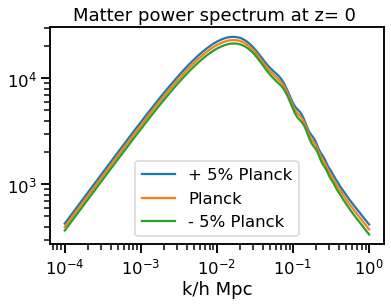

In [5]:
for i, params in enumerate(parameters):
        plt.loglog(kh_nonlin, pk[i][0,:], label = labels[i])

plt.title('Matter power spectrum at z= 0 ');
plt.xlabel('k/h Mpc');
plt.legend(loc = 'lower center');

plt.savefig('camb.png', bbox_inches='tight', dpi = 300)